In [76]:
#Data manipulation,analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
#load the data
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
print("First 5 rows of Dataset:")
print(df.head())
print("\n")


First 5 rows of Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [77]:
#EDA 
print(f"Dataset shape:{df.shape}")
print(f"Number of passengers:{df.shape[0]}")
print(f"Number of features:{df.shape[1]}")
print("\n")

Dataset shape:(891, 12)
Number of passengers:891
Number of features:12




In [78]:
print("Information about dataset")
print(df.info())
print("\n")
print("Statistical summary:")
print(df.describe())
print("\n")

Information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Statistical summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.69

In [79]:
print("Missing values:")
print(df.isnull().sum())
print("\n")
#checking survival rate
print("Survival Rate:")
print(df['Survived'].value_counts())
print(f"Survival percentage: {df['Survived'].mean()*100:.2f}% ")
print("\n")

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Survival Rate:
Survived
0    549
1    342
Name: count, dtype: int64
Survival percentage: 38.38% 




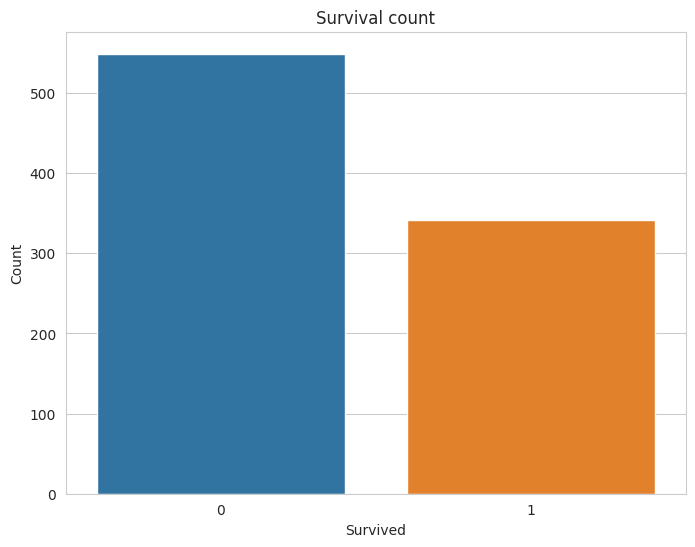

In [80]:
#Data visualization
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',data=df)
plt.title("Survival count")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

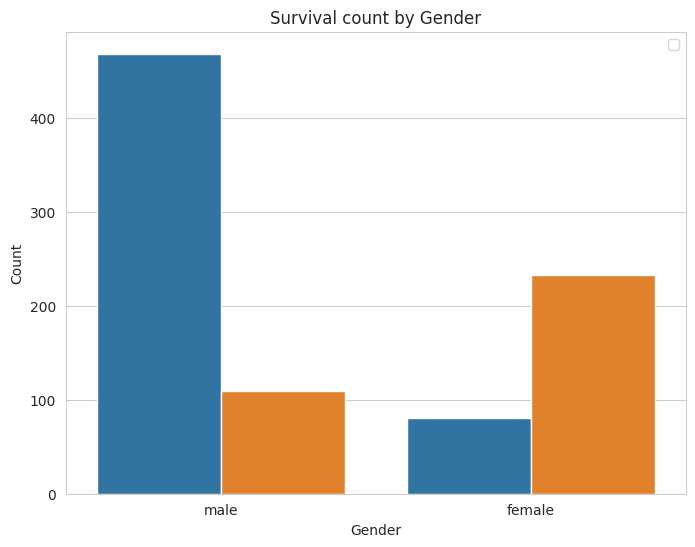

In [81]:
#survival rate by gender
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival count by Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend('Not survived','survived')
plt.show()

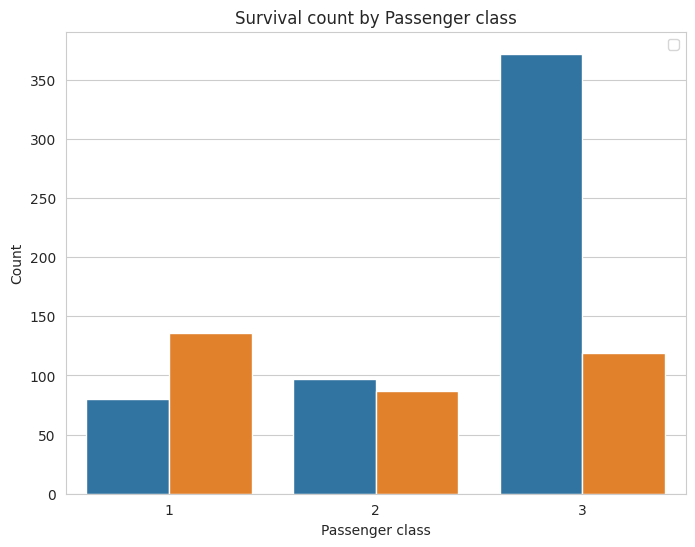

In [82]:
#surviva rate by passenger class
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival count by Passenger class")
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.legend('Not survived','survived')
plt.show()

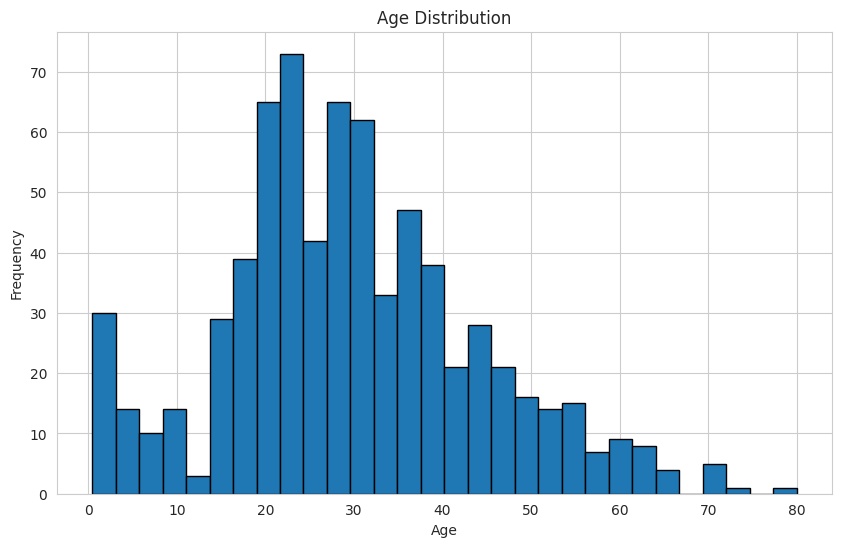

In [83]:
#Age distribution
plt.figure(figsize=(10,6))
df['Age'].dropna().hist(bins=30,edgecolor='black')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

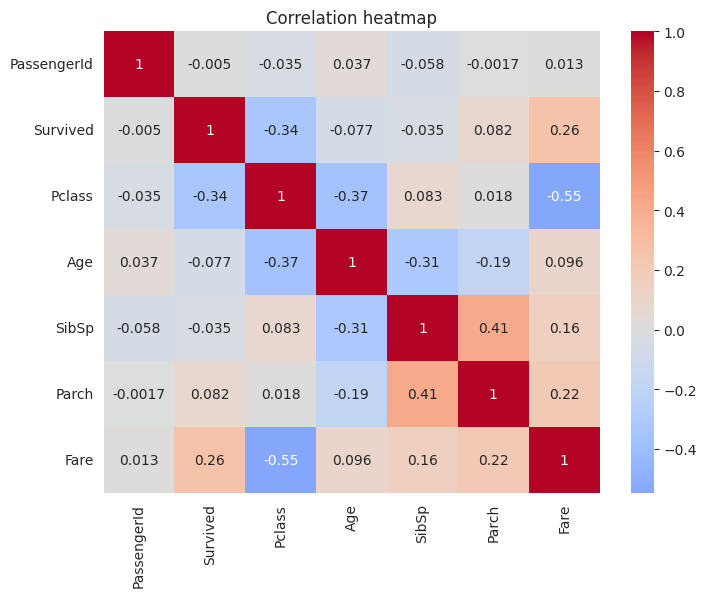

In [84]:
plt.figure(figsize=(8,6))
numeric_dtypes=df.select_dtypes(include=[np.number])
sns.heatmap(numeric_dtypes.corr(),annot=True,cmap='coolwarm',center=0)
plt.title('Correlation heatmap')
plt.show()

In [85]:
#Data preprocesing
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
print("After cleaning")
print(df.isnull().sum())
print("\n")

After cleaning
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64




In [86]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


df['IsAlone'] = 0  
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1  


df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Unique titles:")
print(df['Title'].value_counts())
print("\n")
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 
                                     'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                     'Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print("Titles after grouping:")
print(df['Title'].value_counts())
print("\n")

Unique titles:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


Titles after grouping:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64




In [87]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
embarked_dummies=pd.get_dummies(df['Embarked'],prefix='Embarked')
df=pd.concat([df,embarked_dummies],axis=1)
title_dummies=pd.get_dummies(df['Title'],prefix='Title')
df=pd.concat([df,title_dummies],axis=1)
columns_to_drop=['PassengerId','Name','Ticket','Embarked','Title']
df.drop(columns_to_drop,axis=1,inplace=True)
print("Processed dataframe shape",df.shape)
print("First 5 rows after processing")
print(df.head())
print("/n")

Processed dataframe shape (891, 17)
First 5 rows after processing
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3    1  22.0      1      0   7.2500           2        0   
1         1       1    0  38.0      1      0  71.2833           2        0   
2         1       3    0  26.0      0      0   7.9250           1        1   
3         1       1    0  35.0      1      0  53.1000           2        0   
4         0       3    1  35.0      0      0   8.0500           1        1   

   Embarked_C  Embarked_Q  Embarked_S  Title_Master  Title_Miss  Title_Mr  \
0       False       False        True         False       False      True   
1        True       False       False         False       False     False   
2       False       False        True         False        True     False   
3       False       False        True         False       False     False   
4       False       False        True         False       False      True   

  

In [88]:
#Preparing data for modeling
x=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Training set size:{X_train.shape[0]}")
print(f"Testing set size:{X_test.shape[0]}")
#Standardisation
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Training set size:712
Testing set size:179


In [89]:
#Build and Train models
print('*'*50)
print("LOGISTIC regression")
print("*"*50)
log_reg=LogisticRegression(max_iter=1000,random_state=42)
log_reg.fit(X_train_scaled,Y_train)
y_pred_log=log_reg.predict(X_test_scaled)
accuracy_log=accuracy_score(Y_test,y_pred_log)
print(f"Accuracy score:{accuracy_log*100:.2f}%")
print("\n Confusion matrix")
print(confusion_matrix(Y_test,y_pred_log))
print("\nClassification report")
print(classification_report(Y_test,y_pred_log))
print("\n")


**************************************************
LOGISTIC regression
**************************************************
Accuracy score:82.12%

 Confusion matrix
[[90 15]
 [17 57]]

Classification report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179





In [90]:
print('*'*50)
print("Random forest classifier")
print("*"*50)
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train_scaled,Y_train)
y_pred_clf=rf_clf.predict(X_test_scaled)
accuracy_clf=accuracy_score(Y_test,y_pred_clf)
print(f"Accuracy score:{accuracy_clf*100:.2f}%")
print("\n Confusion matrix")
print(confusion_matrix(Y_test,y_pred_clf))
print("\nClassification report")
print(classification_report(Y_test,y_pred_clf))
print("\n")

**************************************************
Random forest classifier
**************************************************
Accuracy score:83.24%

 Confusion matrix
[[89 16]
 [14 60]]

Classification report
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179





In [91]:
feature_importance=pd.DataFrame({'feature':x.columns,
                                 'importance':rf_clf.feature_importances_}).sort_values('importance',ascending=False)
print("feature importance")
print(feature_importance)
print("\n")

feature importance
         feature  importance
5           Fare    0.242244
2            Age    0.204446
1            Sex    0.127654
13      Title_Mr    0.119665
0         Pclass    0.073631
6     FamilySize    0.053042
14     Title_Mrs    0.036321
3          SibSp    0.034700
12    Title_Miss    0.025612
4          Parch    0.018367
10    Embarked_S    0.014706
11  Title_Master    0.014440
8     Embarked_C    0.012942
7        IsAlone    0.008147
9     Embarked_Q    0.007091
15   Title_Other    0.006991




In [92]:
print('*'*50)
print("Support Vector Machine")
print("*"*50)
svm_clf=SVC(kernel='rbf',random_state=42)
svm_clf.fit(X_train_scaled,Y_train)
y_pred_svm=svm_clf.predict(X_test_scaled)
accuracy_svm=accuracy_score(Y_test,y_pred_svm)
print(f"Accuracy score:{accuracy_svm*100:.2f}%")
print("\n Confusion matrix")
print(confusion_matrix(Y_test,y_pred_svm))
print("\nClassification report")
print(classification_report(Y_test,y_pred_svm))
print("\n")

**************************************************
Support Vector Machine
**************************************************
Accuracy score:80.45%

 Confusion matrix
[[90 15]
 [20 54]]

Classification report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179





**************************************************
MODEL COMPARISON
**************************************************
                    model  Accuracy
1  RandomForestClassifier  0.832402
0     Logistic Regression  0.821229
2                     SVM  0.804469




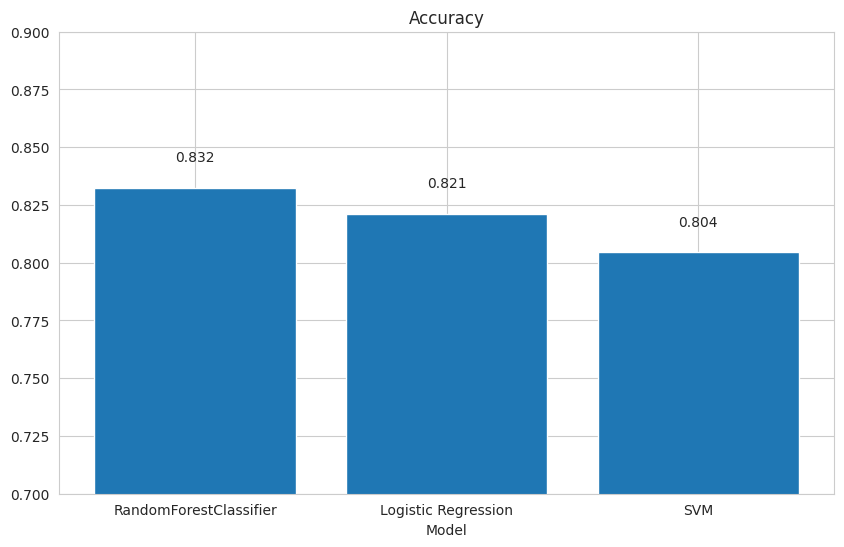

In [106]:
#Model comparison
print("*"*50)
print("MODEL COMPARISON")
print("*"*50)
model_comparison=pd.DataFrame({'model':['Logistic Regression','RandomForestClassifier','SVM'],
                              'Accuracy':[accuracy_log,accuracy_clf,accuracy_svm]}).sort_values ('Accuracy',ascending=False)
print(model_comparison)
print("\n")
plt.figure(figsize=(10,6))
plt.bar(model_comparison['model'],model_comparison['Accuracy'])
plt.title("Model Accuracy Comparison") 
plt.xlabel("Model")
plt.title("Accuracy")
plt.ylim([0.7,0.9])
for i,v in enumerate(model_comparison['Accuracy']):plt.text(i,v+0.01,f'{v:.3f}',ha='center',va='bottom')
plt.show()

In [113]:
#New data

sample_passenger = pd.DataFrame({
    'Pclass': [3],              # 3rd class
    'Sex': [1],                 # Male
    'Age': [22],                # 22 years old
    'SibSp': [1],               # 1 sibling/spouse
    'Parch': [0],               # 0 parents/children
    'Fare': [7.25],             # Fare paid
    'FamilySize': [2],          # Family size (SibSp + Parch + 1)
    'IsAlone': [0],             # Not alone
    'Embarked_C': [0],          # Did not embark at Cherbourg
    'Embarked_Q': [0],          # Did not embark at Queenstown
    'Embarked_S': [1],          # Embarked at Southampton
    'Title_Master': [0],        # Not Master
    'Title_Miss': [0],          # Not Miss
    'Title_Mr': [1],            # Is Mr
    'Title_Mrs': [0],           # Not Mrs
    'Title_Other': [0]          # Not Other
})
sample_scaled=scaler.transform(sample_passenger)
prediction=rf_clf.predict(sample_scaled)
probability=rf_clf.predict_proba(sample_scaled)
print("=" * 50)
print("PREDICTION FOR NEW PASSENGER")
print("=" * 50)
print(f"Prediction: {'Survived' if prediction[0]==1 else 'Not survived'}")
print(f"Probability of survival : {probability[0][1]*100:.2f}")
print(f"Probability of no survival : {probability[0][0]*100:.2f}")

PREDICTION FOR NEW PASSENGER
Prediction: Not survived
Probability of survival : 10.00
Probability of no survival : 90.00
